# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

## _______________________________________________________

# Uploading Data

In [2]:
df= pd.read_csv("recommended.csv",na_values=["#", "unknown", "N/A", "?", "-", "None"])

## _______________________________________________________

# Understanding Data

In [3]:
df.head(10)
#returns the first ten rows

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30-Nov-19,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
1,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29-Nov-19,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
2,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,29-Nov-19,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
3,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,29-Nov-19,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
4,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,29-Nov-19,2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
5,81172899,Payday,Cheta Chukwu,"Baaj Adebule, Ebiye Victor, Meg Otanwa, Bisola...",Nigeria,29-Nov-19,2018,TV-MA,110 min,"Comedies, Independent Movies, International Mo...","After an expensive night out, two flatmates ge...",Movie
6,81172908,The Accidental Spy,Roger Russell,"Ramsey Nouah, Christine Allado, Ayo Makun, Emm...",Nigeria,29-Nov-19,2017,TV-14,104 min,"Action & Adventure, Comedies, International Mo...","Nursing a broken heart, an IT specialist moves...",Movie
7,81172901,The Island,Toka McBaror,"Sambasa Nzeribe, Segun Arinze, Tokunbo Idowu, ...",Nigeria,29-Nov-19,2018,TV-14,93 min,"Dramas, International Movies, Thrillers",When a colonel uncovers controversial intel ab...,Movie
8,81033086,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,28-Nov-19,2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie
9,60020826,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...","Germany, Canada, United States",28-Nov-19,2001,R,124 min,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",Movie


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3446 non-null   int64 
 1   title         3446 non-null   object
 2   director      3446 non-null   object
 3   cast          3446 non-null   object
 4   country       3446 non-null   object
 5   date_added    3446 non-null   object
 6   release_year  3446 non-null   int64 
 7   rating        3446 non-null   object
 8   duration      3446 non-null   object
 9   listed_in     3446 non-null   object
 10  description   3446 non-null   object
 11  type          3446 non-null   object
dtypes: int64(2), object(10)
memory usage: 323.2+ KB


In [5]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [6]:
df.describe()

,show_id,release_year
count,3.446000e+03,3446.000000
mean,7.599321e+07,2012.572258
std,1.181102e+07,9.115793
min,2.698800e+05,1942.000000
25%,7.030419e+07,2012.000000
50%,8.015443e+07,2016.000000
75%,8.023964e+07,2017.000000
max,8.122720e+07,2019.000000


In [7]:
min_year=df['release_year'].min()
max_year=df['release_year'].max()
counts = df['release_year'].value_counts()
count_Mo = df['type'].value_counts().reset_index()
count_Mo.columns = ['type', 'count']
top_year = counts.index[0]
print(min_year,max_year)
print(count_Mo)

1942 2019
      type  count
0    Movie   3383
1  TV Show     63


In [8]:
apove_2017=df[df['release_year']>=2017]
b_2017=df[df['release_year']<2017]
counting=apove_2017['type'].value_counts()
cn=b_2017['type'].value_counts()
print(counting)
print("-"*20)
print(cn)


type
Movie      1317
TV Show      35
Name: count, dtype: int64
--------------------
type
Movie      2066
TV Show      28
Name: count, dtype: int64


## _______________________________________________________

# Data Visualization 

In [9]:
### Getting the number of movies for each rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']

ratings_count

,rating,count
0,TV-MA,1135
1,TV-14,827
2,R,431
3,TV-PG,334
4,PG-13,222
5,NR,175
6,PG,154
7,TV-G,53
8,TV-Y7,43
9,G,30


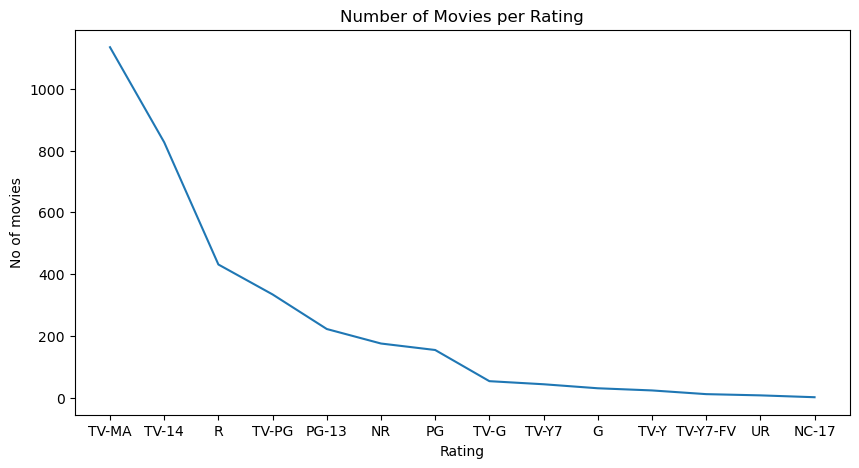

In [10]:
plt.figure(figsize=(10, 5)) # Create a new figure with width=10 inches and height=5 inches
plt.plot(ratings_count['rating'],ratings_count['count'])
plt.title('Number of Movies per Rating')
plt.xlabel('Rating')
plt.ylabel('No of movies')
plt.show()

In [11]:
### Getting the number of movies for each country
countries_count=df['country'].value_counts().reset_index()
countries_count.columns=['country','count']
top_10=countries_count.head(10)
top_10

,country,count
0,United States,1205
1,India,628
2,United Kingdom,139
3,Canada,76
4,Spain,69
5,Turkey,59
6,Mexico,48
7,Hong Kong,48
8,Japan,46
9,France,44


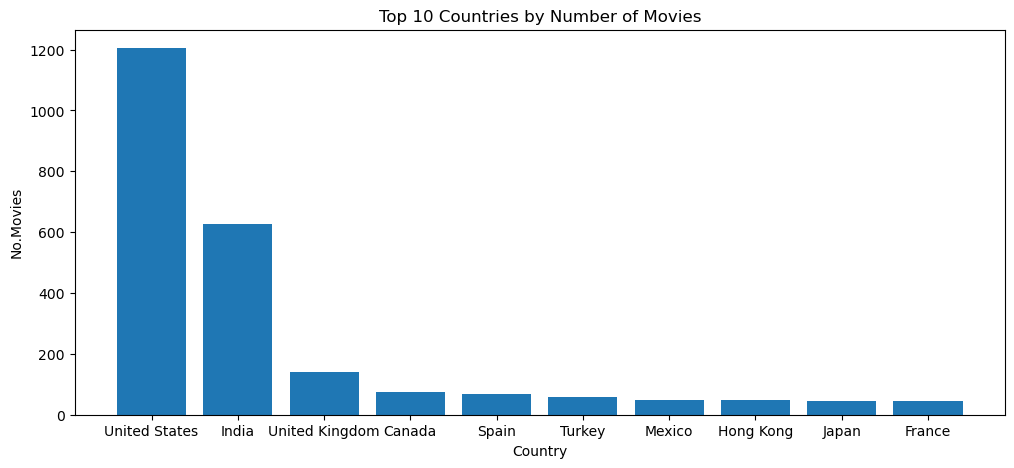

In [12]:
plt.figure(figsize=(12,5)) # Create a new figure with width=12 inches and height=5 inches
plt.bar(top_10['country'], top_10['count'])
plt.title('Top 10 Countries by Number of Movies')
plt.ylabel('No.Movies')
plt.xlabel('Country')
plt.show()